### Reading images

In [1]:
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import cv2
import os

%matplotlib inline
%env PYDEVD_DISABLE_FILE_VALIDATION=1

env: PYDEVD_DISABLE_FILE_VALIDATION=1


#### Art styles in the dataframe

1. **Western Medieval:**
   - Art created during the Middle Ages in Europe, characterized by religious themes, illuminated manuscripts, and Gothic architecture.

2. **Romanticism:**
   - A movement in art and literature emphasizing emotion, imagination, and nature. Often includes depictions of exotic landscapes, dramatic scenes, and a focus on individual expression.

3. **Art Nouveau:**
   - An artistic style characterized by intricate, decorative designs, often inspired by natural forms and structures. Common in architecture, decorative arts, and graphic design.

4. **Academic Art:**
   - Artistic styles and techniques taught in traditional art academies. Emphasizes realistic representation, often associated with historical and mythological subjects.

5. **Japanese Art:**
   - Diverse art styles from Japan, including traditional forms like ukiyo-e woodblock prints, as well as contemporary art influenced by Japanese cultural aesthetics.

6. **Renaissance:**
   - A period of cultural and artistic rebirth in Europe, marked by a revival of interest in classical Greek and Roman art. Known for realistic portrayal of human figures and perspective in painting.

7. **Symbolism:**
   - A late 19th-century movement emphasizing symbolic and dreamlike imagery. Artists sought to express emotions and ideas through symbolic and often fantastical representations.

8. **Expressionism:**
   - An art movement emphasizing emotional expression and subjective interpretation. Often characterized by distorted forms, bold colors, and a focus on inner experience.

9. **Baroque:**
   - A dynamic and ornate style that emerged in the 17th century, known for its grandeur, dramatic compositions, and use of light and shadow.

10. **Primitivism:**
    - An art movement influenced by non-Western and prehistoric art. Artists sought a more direct, instinctive approach and a return to "primitive" artistic forms.

11. **Rococo:**
    - An 18th-century style characterized by ornate and playful decoration. Commonly found in architecture, interior design, and painting.

12. **Realism:**
    - An art movement that emerged in the 19th century, emphasizing accurate and detailed depiction of everyday life and ordinary people.

13. **Neoclassicism:**
    - An art movement that drew inspiration from classical antiquity. Characterized by a return to classical forms, clear composition, and idealized depictions of subjects.


In [2]:
# reading styles

# get the styles names
styles = os.listdir('archive')
print(styles)


['Western_Medieval', 'Romanticism', 'Art_Nouveau', 'Academic_Art', 'Japanese_Art', 'Renaissance', 'Symbolism', 'Expressionism', 'Baroque', 'Primitivism', 'Rococo', 'Realism', 'Neoclassicism']


In [3]:
# check how many files per style
for style in styles:
    os.listdir((f'archive/{style}/{style}'))
    print(style, len(os.listdir((f'archive/{style}/{style}'))))

Western_Medieval 1158
Romanticism 6813
Art_Nouveau 3035
Academic_Art 1305
Japanese_Art 2235
Renaissance 6192
Symbolism 1510
Expressionism 2607
Baroque 5312
Primitivism 1324
Rococo 2521
Realism 5373
Neoclassicism 3115


In [4]:
xy = 200

In [5]:
import cv2 

# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    image_crop = np.copy(image)
    row_crop = 7
    col_crop = 8
    image_crop = image[row_crop:-row_crop, col_crop:-col_crop, :]
    standard_im = cv2.resize(image_crop, (xy, xy))
    return standard_im

(720, 607, 3)


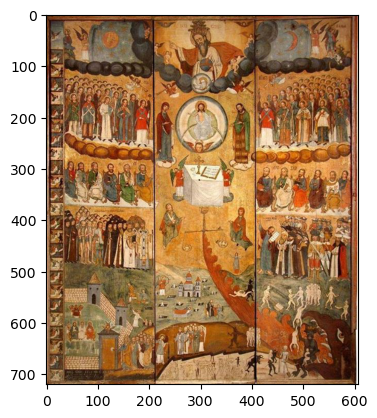

In [6]:
# test image
test_img = glob.glob(f'archive/Western_Medieval/Western_Medieval/9223372032559869461.jpg')[0]
test_img = mpimg.imread(test_img)
print(test_img.shape)
plt.imshow(test_img)

### Preparing the data

(200, 200, 3)


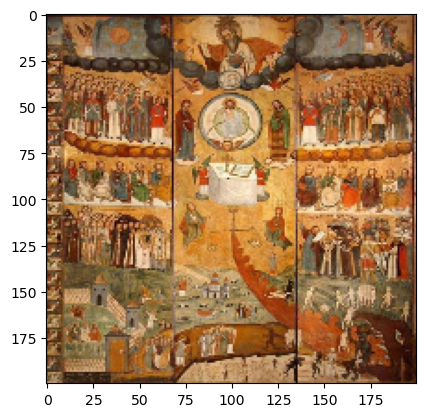

In [7]:
#standarize the image
std_img = standardize_input(test_img)
print(std_img.shape)
plt.imshow(std_img)

In [8]:
# reading samples and adding lables
def read_files(style):
    ims_list = list()

    for file in glob.glob(f'archive/{style[0]}/{style[0]}/*')[:1200]:
        # Read in the image
        im = mpimg.imread(file)
        
        if len(im.shape) < 3: #skip black and white images
                continue
        
        # I need to add a cmyk conversion in here
        if im.shape[2] != 3: #make sure to keep only rgb channels
                continue
    
        try:
            
            # standarize(im) 28x28
            std_im = standardize_input(im)
            
            # normalize(im) im/255
            norm_std_im = std_im/255
            
            # Append the image to the green image list

            ims_list.append((norm_std_im,style[1]))
        
        except ValueError as e:
            print(f"Caught an exception: {e}")
            print(file)

    return ims_list

In [9]:
styles

['Western_Medieval',
 'Romanticism',
 'Art_Nouveau',
 'Academic_Art',
 'Japanese_Art',
 'Renaissance',
 'Symbolism',
 'Expressionism',
 'Baroque',
 'Primitivism',
 'Rococo',
 'Realism',
 'Neoclassicism']

In [10]:
selected_styles = [('Japanese_Art', 0), ('Rococo', 1), ('Primitivism', 2)]

In [11]:
print("reading -->", selected_styles[0][0])
style1 = read_files(selected_styles[0])
print("No. images -->", len(style1), "\n")
print(" ======= ")

print("reading -->", selected_styles[1][0])
style2 = read_files(selected_styles[1])
print("No. images -->", len(style2), "\n")
print(" ======= ")

print("reading -->", selected_styles[2][0])
style3 = read_files(selected_styles[2])
print("No. images -->", len(style3), "\n")

reading --> Japanese_Art
No. images --> 1186 

reading --> Rococo
No. images --> 1179 

reading --> Primitivism
No. images --> 1111 



In [12]:
ims_list = style1 + style2 + style3

In [13]:
#check the images count
len(ims_list)

3476

In [14]:
# randomize the images
import random
random.seed(31101992)

random.shuffle(ims_list)

In [15]:
# split train and test labels
X = [img[0] for img in ims_list]
y = [label[1] for label in ims_list]

In [16]:
expected_shape = (xy, xy, 3)

for image in X:
    if image.shape != expected_shape:
        print(f"Invalid shape found: {image.shape}. Expected shape: {expected_shape}")
        # You may choose to break the loop or raise an exception if an invalid shape is found

# If the loop completes without printing, all shapes are as expected
print("All images have the expected shape.")

All images have the expected shape.


In [17]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31, stratify=y
)

In [18]:
# clearning up the cashe
del X, y, ims_list, style1, style2, style3

In [19]:
# convert to np.array in batches because the codes keeps breaking
batch_size = 64 

X_batches = []

for i in range(0, len(X_train), batch_size):
    X_batch = np.array(X_train[i:i + batch_size])

    X_batches.append(X_batch)

# Concatenate batches to get the final numpy arrays
X_train = np.concatenate(X_batches, axis=0)
y_train = np.array(y_train)

In [20]:
# convert the data to np.array for tensorflow
batch_size = 64 

X_batches = []
y_batches = []

for i in range(0, len(X_test), batch_size):
    X_batch = np.array(X_test[i:i + batch_size])

    X_batches.append(X_batch)

# Concatenate batches to get the final numpy arrays
X_test = np.concatenate(X_batches, axis=0)
y_test= np.array(y_test)

In [21]:
import pickle

# Pickle the variables
with open("train_test/X_train.pkl", "wb") as file:
    pickle.dump(X_train, file)

with open("train_test/X_test.pkl", "wb") as file:
    pickle.dump(X_test, file)

with open("train_test/y_train.pkl", "wb") as file:
    pickle.dump(y_train, file)

with open("train_test/y_test.pkl", "wb") as file:
    pickle.dump(y_test, file)


### Setting up the model

In [21]:
import tensorflow as tf

2023-12-10 19:50:26.073915: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])


model_nn = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Flatten(input_shape=(xy, xy, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3) 
])

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)

model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

history_nn = model_nn.fit(X_train, y_train, epochs=10, callbacks=[early_stopping])

In [ ]:
test_loss_nn, test_acc_nn = model_nn.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc_nn)

In [ ]:
import pickle

# Pickle the model
with open("model_nn.pkl", "wb") as file:
    pickle.dump(model_nn, file)


### CNN

In [ ]:
model_cnn = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(xy, xy, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_cnn.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_cnn =  model_cnn.fit(X_train, y_train, epochs=10, callbacks=[early_stopping])

In [ ]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc_cnn)

In [ ]:
import pickle

# Pickle the model
with open("model_cnn.pkl", "wb") as file:
    pickle.dump(model_cnn, file)